In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ==========================
# HÜCRE 1
# ==========================
# Gerekli kütüphanelerin kurulumu ve importları

!pip install psutil xgboost statsmodels tensorflow

import psutil
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CPU ölçümü fonksiyonu
def measure_cpu_usage():
    cpu_usage = psutil.cpu_percent(interval=1)  # 1 sn bekleyip ölçüyor
    print(f"Anlık CPU Kullanımı: %{cpu_usage}")

print("Kurulumlar tamamlandı ve temel kütüphaneler import edildi.")
measure_cpu_usage()

Kurulumlar tamamlandı ve temel kütüphaneler import edildi.
Anlık CPU Kullanımı: %8.5


In [ ]:
# ==========================
# HÜCRE 2
# ==========================
# Veri yükleme ve ilk bakış

measure_cpu_usage()

# Dosya yolu (kendi Drive/Colab konumunuza göre düzenleyin)
file_path = '/content/drive/MyDrive/Colab_Notebooks/AI_Babies/Samsung_Innovation/yenilenebilirenerjikaynaklarituketimi.csv'

# Veri okuma
df = pd.read_csv(file_path)

# İlk bakış
print("=== df.head(5) ===")
display(df.head(5))

print("\n=== df.info() ===")
df.info()

print("\n=== df.shape ===")
print(df.shape)

measure_cpu_usage()

Anlık CPU Kullanımı: %23.5
=== df.head(5) ===


,Series Name,Series Code,Country Name,Country Code,YRbir,YRiki,YRuc,YRdort,YRbes,YRalti,...,YRonyedi,YRonsekiz,YRondokuz,YRyirmi,YRyirmibir,YRyirmiiki,YRyirmiuc,YRyirmidort,YRyirmibes,YRyirmialti
0,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,India,IND,58.652858348278,57.6047933357271,57.2305674845727,56.9833633428903,55.5571874605853,54.4841170038941,...,47.4437217093748,45.8678035195348,43.6328830116274,40.7708275885812,39.4815087312075,38.9317402139462,38.3908901522843,37.8498411784972,36.651837856374,36.0212225652817
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,24.5107769566024,24.1841976443576,24.2205063657889,23.8253260480197,24.2430766548778,22.0984419532268,...,14.2454862538097,12.4845983837871,12.4154978671671,13.3283805737173,14.3264961064921,12.7806127796583,12.8316846317276,13.8475452599085,11.6078875438469,13.3742300375217
2,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Afghanistan,AFG,15.9245316828932,17.0364435282942,26.5216286544368,30.5856670489932,32.7962505504008,35.0756402917937,...,37.1372494911803,33.8625788265031,21.3437080759002,17.8138547564602,14.8398059645804,11.4827062291243,13.9735856888609,16.3342925084743,19.3142686133983,18.4234771693218
3,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Albania,ALB,25.5180876255371,32.9981742379589,46.8133288085849,51.152042295146,51.4595442246242,50.6097095765374,...,31.7101954257698,32.1009372127814,35.9129061124767,37.2166378004051,37.1153297675702,35.9625316031337,40.048299596384,41.2889737241069,38.6895007576277,38.6152104692153
4,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Algeria,DZA,0.177228302572834,0.323692176020233,0.289771220945935,0.476341507213619,0.403959587292277,0.422480314895262,...,0.40872736909712,0.411409249680193,0.298765661995095,0.311808048810447,0.258071761617743,0.177339472170288,0.188181413152951,0.140451784823769,0.0686404751413344,0.0589586840918149



=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Series Name   263 non-null    object
 1   Series Code   250 non-null    object
 2   Country Name  250 non-null    object
 3   Country Code  250 non-null    object
 4   YRbir         250 non-null    object
 5   YRiki         250 non-null    object
 6   YRuc          250 non-null    object
 7   YRdort        250 non-null    object
 8   YRbes         250 non-null    object
 9   YRalti        250 non-null    object
 10  YRyedi        250 non-null    object
 11  YRsekiz       250 non-null    object
 12  YRdokuz       250 non-null    object
 13  YRon          250 non-null    object
 14  YRonbir       250 non-null    object
 15  YRoniki       250 non-null    object
 16  YRonuc        250 non-null    object
 17  YRondort      250 non-null    object
 18  YRonbes       250 non-null    o

In [ ]:
# ==========================
# HÜCRE 3
# ==========================
# Veri temizliği ve numeric dönüşümler

measure_cpu_usage()

# 1) 'Country Name' kolonunda eksik veri varsa at
df = df.dropna(subset=['Country Name'])

# 2) Numeric sütunları belirle
numeric_cols = df.columns[4:]  # 0: Series Name, 1: Series Code, 2: Country Name, 3: Country Code

# Tüm numeric kolonları float'a çevir
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Eksik veri sayısı (ön)
print("=== Eksik veri sayısı (ilk) ===")
print(df.isna().sum())

# Eksik değer doldurma
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', axis=1, limit_direction='both')
df[numeric_cols] = df[numeric_cols].ffill(axis=1).bfill(axis=1)

# Eksik veri sayısı (son)
print("\n=== Eksik veri sayısı (son) ===")
print(df.isna().sum())

measure_cpu_usage()

Anlık CPU Kullanımı: %28.8
=== Eksik veri sayısı (ilk) ===
Series Name      0
Series Code      0
Country Name     0
Country Code     0
YRbir           20
YRiki           19
YRuc            15
YRdort          15
YRbes           15
YRalti          14
YRyedi          14
YRsekiz         14
YRdokuz         14
YRon            14
YRonbir         11
YRoniki         11
YRonuc           9
YRondort         9
YRonbes          9
YRonalti         8
YRonyedi         8
YRonsekiz        7
YRondokuz        7
YRyirmi          7
YRyirmibir       7
YRyirmiiki       7
YRyirmiuc        5
YRyirmidort      5
YRyirmibes       5
YRyirmialti      5
dtype: int64

=== Eksik veri sayısı (son) ===
Series Name     0
Series Code     0
Country Name    0
Country Code    0
YRbir           5
YRiki           5
YRuc            5
YRdort          5
YRbes           5
YRalti          5
YRyedi          5
YRsekiz         5
YRdokuz         5
YRon            5
YRonbir         5
YRoniki         5
YRonuc          5
YRondort        5
Y

<ipython-input-6-dd49b571cf95>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


Anlık CPU Kullanımı: %24.5


In [ ]:
# ==========================
# HÜCRE 4
# ==========================
# Melt işlemi ("YRbir, YRiki, ..." -> uzun formata dönüştürme)
# Ayrıca "bir, iki, uc, ..." ifadelerini yıla dönüştürmek için bir sözlük kullanacağız

measure_cpu_usage()

year_map = {
    'bir': 1, 'iki': 2, 'uc':3, 'dort':4, 'bes':5, 'alti':6,
    'yedi':7, 'sekiz':8, 'dokuz':9, 'on':10, 'onbir':11, 'oniki':12, 'onuc':13,
    'ondort':14, 'onbes':15, 'onalti':16, 'onyedi':17, 'onsekiz':18, 'ondokuz':19,
    'yirmi':20, 'yirmibir':21, 'yirmiiki':22, 'yirmiuc':23,
    'yirmidort':24, 'yirmibes':25, 'yirmialti':26
}

melt_df = df.melt(
    id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'],
    value_vars=numeric_cols,
    var_name='YR_label',
    value_name='Renewable_Value'
)

def convert_yr_to_numeric(yr_label):
    if yr_label.startswith("YR"):
        suffix = yr_label[2:].strip().lower()  # "bir", "iki", ...
        return year_map.get(suffix, np.nan)
    return np.nan

melt_df['Year'] = melt_df['YR_label'].apply(convert_yr_to_numeric)

# Geçersiz yıl satırlarını at
melt_df = melt_df.dropna(subset=['Year'])

melt_df['Year'] = melt_df['Year'].astype(int)

print("=== melt_df.head(5) ===")
display(melt_df.head(5))

measure_cpu_usage()

Anlık CPU Kullanımı: %29.5
=== melt_df.head(5) ===


,Series Name,Series Code,Country Name,Country Code,YR_label,Renewable_Value,Year
0,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,India,IND,YRbir,58.652858,1
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRbir,24.510777,1
2,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Afghanistan,AFG,YRbir,15.924532,1
3,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Albania,ALB,YRbir,25.518088,1
4,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Algeria,DZA,YRbir,0.177228,1


Anlık CPU Kullanımı: %88.0


Anlık CPU Kullanımı: %98.5
melt_df.shape: (6500, 7)
Farklı ülke sayısı: 250
Min Yıl: 1  - Max Yıl: 26

=== describe() ===


,Renewable_Value
count,6370.000000
mean,31.672913
std,29.977707
min,0.000000
25%,5.226812
50%,22.389768
75%,53.907784
max,98.303706


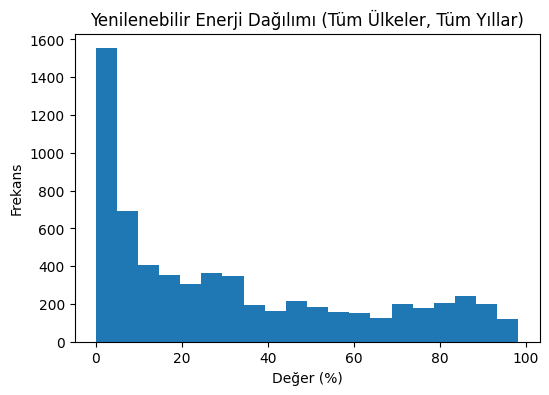

Anlık CPU Kullanımı: %89.4


In [ ]:
# ==========================
# HÜCRE 5
# ==========================
# Basit EDA (Histogram, describe, vb.)

measure_cpu_usage()

print("melt_df.shape:", melt_df.shape)
print("Farklı ülke sayısı:", melt_df['Country Name'].nunique())
print("Min Yıl:", melt_df['Year'].min(), " - Max Yıl:", melt_df['Year'].max())

# Temel istatistiksel özet (Renewable_Value)
print("\n=== describe() ===")
display(melt_df['Renewable_Value'].describe())

# Histogram
plt.figure(figsize=(6,4))
plt.hist(melt_df['Renewable_Value'].dropna(), bins=20)
plt.title("Yenilenebilir Enerji Dağılımı (Tüm Ülkeler, Tüm Yıllar)")
plt.xlabel("Değer (%)")
plt.ylabel("Frekans")
plt.show()

measure_cpu_usage()

Anlık CPU Kullanımı: %82.6
Turkey veri sayısı: 26


,Series Name,Series Code,Country Name,Country Code,YR_label,Renewable_Value,Year
1,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRbir,24.510777,1
251,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRiki,24.184198,2
501,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRuc,24.220506,3
751,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRdort,23.825326,4
1001,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRbes,24.243077,5
1251,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRalti,22.098442,6
1501,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRyedi,21.243044,7
1751,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRsekiz,20.841288,8
2001,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRdokuz,21.634269,9
2251,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,Turkey,TUR,YRon,20.555426,10


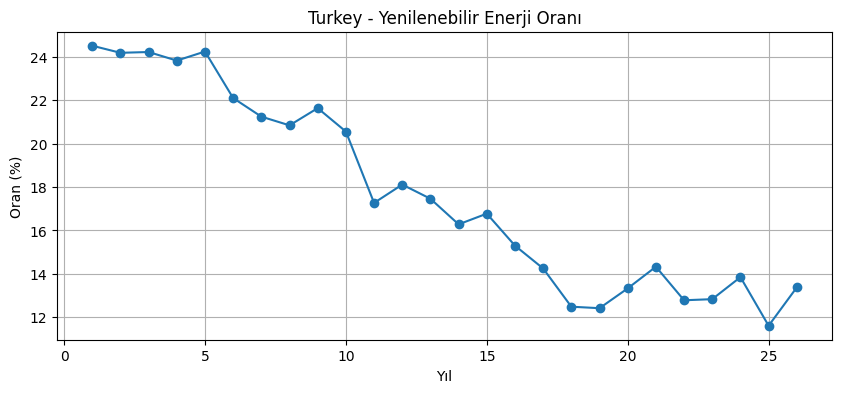

Anlık CPU Kullanımı: %83.5


In [ ]:
# ==========================
# HÜCRE 6
# ==========================
# Örnek olarak "Turkey" ülkesine odaklanarak zaman serisi oluşturma

measure_cpu_usage()

country_name = "Turkey"  # Eğer veri setinde "Turkey" yerine "Türkiye" varsa değiştirin
country_df = melt_df[melt_df["Country Name"] == country_name].copy()

country_df = country_df.sort_values("Year")

print(f"{country_name} veri sayısı:", len(country_df))
display(country_df.head(10))

# Zaman serisi grafiği
plt.figure(figsize=(10,4))
plt.plot(country_df['Year'], country_df['Renewable_Value'], marker='o')
plt.title(f"{country_name} - Yenilenebilir Enerji Oranı")
plt.xlabel("Yıl")
plt.ylabel("Oran (%)")
plt.grid(True)
plt.show()

measure_cpu_usage()

In [ ]:
# ==========================
# HÜCRE 7
# ==========================
# Train/Test ayrımı (Zaman serisi = kronolojik ayrım)

measure_cpu_usage()

y_renew = country_df['Renewable_Value'].values
years   = country_df['Year'].values

train_size = int(len(y_renew) * 0.8)
train_data = y_renew[:train_size]
test_data  = y_renew[train_size:]

print("Train boyutu:", len(train_data))
print("Test boyutu :", len(test_data))

# Hata kontrolü: eğer test_data boş veya çok küçükse model eğitimi sıkıntı verebilir
measure_cpu_usage()

Anlık CPU Kullanımı: %59.1
Train boyutu: 20
Test boyutu : 6
Anlık CPU Kullanımı: %3.5


In [ ]:
# ==========================
# HÜCRE 8
# ==========================
# Performans metrikleri fonksiyonları (MAE, MSE, RMSE, MAPE, sMAPE, Accuracy)

measure_cpu_usage()

from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

def custom_accuracy(y_true, y_pred, tolerance_ratio=0.10):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    tolerances = np.abs(y_true) * tolerance_ratio
    correct = np.abs(y_true - y_pred) <= tolerances
    return np.mean(correct) * 100

def calculate_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    mae_ = mean_absolute_error(y_true, y_pred)
    mse_ = mean_squared_error(y_true, y_pred)
    rmse_ = np.sqrt(mse_)
    mape_ = mape(y_true, y_pred)
    smape_ = smape(y_true, y_pred)
    accuracy_ = custom_accuracy(y_true, y_pred, tolerance_ratio=0.10)

    return {
        "MAE": mae_,
        "MSE": mse_,
        "RMSE": rmse_,
        "MAPE": mape_,
        "sMAPE": smape_,
        "Accuracy(±10%)": accuracy_
    }

print("Performans metrik fonksiyonları tanımlandı.")
measure_cpu_usage()

Anlık CPU Kullanımı: %74.9
Performans metrik fonksiyonları tanımlandı.
Anlık CPU Kullanımı: %76.6


In [ ]:
# ==========================
# HÜCRE 9
# ==========================
# ARIMA (statsmodels) örneği

measure_cpu_usage()

from statsmodels.tsa.arima.model import ARIMA

arima_metrics = None

if len(train_data) > 2:  # En az 3 veri varsa deneyelim
    try:
        model_arima = ARIMA(train_data, order=(1,0,1))  # (p,d,q) örnek parametre
        model_arima_fit = model_arima.fit()
        forecast_arima = model_arima_fit.forecast(steps=len(test_data))

        arima_metrics = calculate_metrics(test_data, forecast_arima)
        print("ARIMA Metrikleri:", arima_metrics)
    except Exception as e:
        print("ARIMA modelinde hata oluştu:", e)
else:
    print("Train seti ARIMA için yetersiz.")

measure_cpu_usage()

Anlık CPU Kullanımı: %78.6
ARIMA Metrikleri: {'MAE': 1.24268949571652, 'MSE': 2.1383540811059127, 'RMSE': np.float64(1.4623112121248036), 'MAPE': np.float64(9.880928708417645), 'sMAPE': np.float64(9.254652143953416), 'Accuracy(±10%)': np.float64(83.33333333333334)}
Anlık CPU Kullanımı: %90.9


In [ ]:
# ==========================
# HÜCRE 10
# ==========================
# SARIMA (statsmodels) örneği - yıllık veri için mevsimsellik kapatılabilir

measure_cpu_usage()

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_metrics = None

if len(train_data) > 2:
    try:
        # Yıllık veri için mevsimsellik kapatalım: seasonal_order=(0,0,0,1) veya (0,0,0,0)
        model_sarima = SARIMAX(train_data,
                               order=(1,0,1),
                               seasonal_order=(1,1,1,12),  # mevsimsellik kapalı
                               enforce_stationarity=False,
                               enforce_invertibility=False)
        sarima_fit = model_sarima.fit(disp=False)

        forecast_sarima = sarima_fit.forecast(steps=len(test_data))
        sarima_metrics = calculate_metrics(test_data, forecast_sarima)
        print("SARIMA Metrikleri:", sarima_metrics)
    except Exception as e:
        print("SARIMA modelinde hata oluştu:", e)
else:
    print("Train seti SARIMA için yetersiz.")

measure_cpu_usage()

Anlık CPU Kullanımı: %4.0
SARIMA Metrikleri: {'MAE': 1.6119381760485083, 'MSE': 3.690552872899842, 'RMSE': np.float64(1.9210811729075485), 'MAPE': np.float64(12.191392235929357), 'sMAPE': np.float64(13.2254429660442), 'Accuracy(±10%)': np.float64(50.0)}


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Anlık CPU Kullanımı: %3.0


In [ ]:
# ==========================
# HÜCRE 11
# ==========================
# XGBoost Modeli + basit TimeSeriesSplit + GridSearch
# (t-1)->(t) yaklaşımı, basit feature engineering

measure_cpu_usage()

from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

xgb_metrics = None

def create_lag_features(series, lag=1):
    X, y = [], []
    for i in range(lag, len(series)):
        X.append(series[i-lag:i])
        y.append(series[i])
    return np.array(X), np.array(y)

if len(train_data) > 2:
    try:
        # Train set (t-1)->(t)
        X_train, y_train = create_lag_features(train_data, lag=1)
        # Test set
        X_test, y_test = create_lag_features(np.concatenate([train_data[-1:], test_data]), lag=1)

        params = {
            'n_estimators': [50, 100],
            'max_depth': [2, 3],
            'learning_rate': [0.1, 0.01],
        }

        tscv = TimeSeriesSplit(n_splits=3)
        xgb_model = XGBRegressor(random_state=42)

        grid_search = GridSearchCV(xgb_model, params, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print("En iyi XGBoost parametreleri:", grid_search.best_params_)

        best_xgb = grid_search.best_estimator_
        xgb_pred = best_xgb.predict(X_test)

        xgb_metrics = calculate_metrics(y_test, xgb_pred)
        print("XGBoost Metrikleri:", xgb_metrics)
    except Exception as e:
        print("XGBoost modelinde hata oluştu:", e)
else:
    print("Train seti XGBoost için yetersiz.")

measure_cpu_usage()

Anlık CPU Kullanımı: %3.0
En iyi XGBoost parametreleri: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
XGBoost Metrikleri: {'MAE': 0.6983063341809975, 'MSE': 0.7692336614248942, 'RMSE': np.float64(0.8770596681098124), 'MAPE': np.float64(5.342061444997434), 'sMAPE': np.float64(5.353030389623688), 'Accuracy(±10%)': np.float64(83.33333333333334)}
Anlık CPU Kullanımı: %67.7


In [24]:
# ==========================
# HÜCRE 12
# ==========================
# LSTM (Keras/TensorFlow) - yine (t-1)->(t) örneği

measure_cpu_usage()

import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

lstm_metrics = None

if len(train_data) > 2:
    try:
        # 1) VERİYİ SCALE ET
        all_data = np.concatenate([train_data, test_data])  # (train + test)
        scaler = MinMaxScaler()
        all_data_scaled = scaler.fit_transform(all_data.reshape(-1,1))

        # Train ve Test verisini ayrıştır
        train_data_scaled = all_data_scaled[:len(train_data)]
        test_data_scaled  = all_data_scaled[len(train_data):]

        # (t-1)->(t) fonksiyonu
        def create_lag_features(series, lag=1):
            X, y = [], []
            for i in range(lag, len(series)):
                X.append(series[i-lag:i])
                y.append(series[i])  # (t)
            return np.array(X), np.array(y)

        # X_train, y_train
        X_train_lstm, y_train_lstm = create_lag_features(train_data_scaled, lag=1)
        # X_test, y_test
        last_train_val = train_data_scaled[-1:]
        test_series = np.concatenate([last_train_val, test_data_scaled])
        X_test_lstm, y_test_lstm = create_lag_features(test_series, lag=1)

        # Reshape -> (samples, timesteps, features)
        X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
        X_test_lstm  = X_test_lstm.reshape((X_test_lstm.shape[0], X_test_lstm.shape[1], 1))

        # 2) İKİ KATMANLI LSTM
        model_lstm = Sequential()
        # İlk LSTM katmanı (return_sequences=True -> output'u bir sonraki LSTM'e aktar)
        model_lstm.add(LSTM(units=32, activation='tanh', return_sequences=True, input_shape=(1, 1)))
        # İkinci LSTM katmanı (return_sequences=False -> son katman)
        model_lstm.add(LSTM(units=16, activation='tanh', return_sequences=False))
        # Dense çıkış katmanı
        model_lstm.add(Dense(1))

        model_lstm.compile(optimizer='adam', loss='mse')

        # 3) EĞİTİM -> 200 EPOCH
        model_lstm.fit(X_train_lstm, y_train_lstm, epochs=200, batch_size=4, verbose=0)

        # 4) TAHMİN
        lstm_pred_scaled = model_lstm.predict(X_test_lstm).flatten()

        # 5) INVERSE TRANSFORM
        lstm_pred_inversed  = scaler.inverse_transform(lstm_pred_scaled.reshape(-1,1)).flatten()
        y_test_inversed     = scaler.inverse_transform(y_test_lstm.reshape(-1,1)).flatten()

        # 6) METRİKLER
        lstm_metrics = calculate_metrics(y_test_inversed, lstm_pred_inversed)
        print("LSTM (2 katman, 200 epoch) Metrikleri:", lstm_metrics)

    except Exception as e:
        print("LSTM modelinde hata oluştu:", e)
else:
    print("Train seti LSTM için yetersiz.")

measure_cpu_usage()


Anlık CPU Kullanımı: %100.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
LSTM (2 katman, 200 epoch) Metrikleri: {'MAE': 1.0686490656568273, 'MSE': 1.46696879915325, 'RMSE': np.float64(1.2111848740606241), 'MAPE': np.float64(8.338686680721324), 'sMAPE': np.float64(8.161241579827278), 'Accuracy(±10%)': np.float64(83.33333333333334)}
Anlık CPU Kullanımı: %3.0


In [25]:
# ==========================
# HÜCRE 13
# ==========================
# Tüm modellerin karşılaştırmalı performans tablosu

measure_cpu_usage()

comparison = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "MAPE": [],
    "sMAPE": [],
    "Accuracy(±10%)": []
}

def add_metrics(model_name, metric_dict):
    comparison["Model"].append(model_name)
    comparison["MAE"].append(metric_dict["MAE"])
    comparison["MSE"].append(metric_dict["MSE"])
    comparison["RMSE"].append(metric_dict["RMSE"])
    comparison["MAPE"].append(metric_dict["MAPE"])
    comparison["sMAPE"].append(metric_dict["sMAPE"])
    comparison["Accuracy(±10%)"].append(metric_dict["Accuracy(±10%)"])

# ARIMA
if arima_metrics is not None:
    add_metrics("ARIMA", arima_metrics)

# SARIMA
if sarima_metrics is not None:
    add_metrics("SARIMA", sarima_metrics)

# XGBoost
if xgb_metrics is not None:
    add_metrics("XGBoost", xgb_metrics)

# LSTM
if lstm_metrics is not None:
    add_metrics("LSTM", lstm_metrics)

results_df = pd.DataFrame(comparison)
print("=== Tüm Modellerin Karşılaştırmalı Performans Tablosu ===")
display(results_df)

measure_cpu_usage()

Anlık CPU Kullanımı: %80.9
=== Tüm Modellerin Karşılaştırmalı Performans Tablosu ===


,Model,MAE,MSE,RMSE,MAPE,sMAPE,Accuracy(±10%)
0,ARIMA,1.242689,2.138354,1.462311,9.880929,9.254652,83.333333
1,SARIMA,1.611938,3.690553,1.921081,12.191392,13.225443,50.000000
2,XGBoost,0.698306,0.769234,0.877060,5.342061,5.353030,83.333333
3,LSTM,1.068649,1.466969,1.211185,8.338687,8.161242,83.333333


Anlık CPU Kullanımı: %81.4
